## Домашнее задание по выборочным распределениям.inference_on_relationships 
Ehson Kholzoda

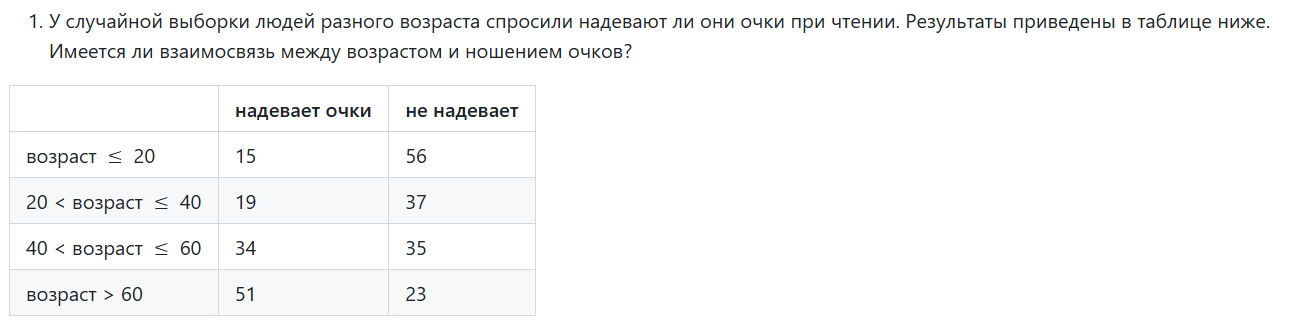

для нашего примера нулевая и альтернативная гипотезу будут такими:  
* $H_0$: Между ношением очков и возрастом нет взаимосвязи.  
* $H_a$: Между ношением очков и возрастом есть взаимосвязи.

Ожидаемые значения рассчитываются по следующей формуле: $$Ожидаемые\space значения=\frac{Итог\space по\space столбцу\cdot Итог\space по\space строке}{Общий\space итог}$$


| | очки | не очки | total |  
|-|-----|----|-------|  
| возраст <= 20 | 31.3 | 39.7  | 15+56 = 71 |  
| 20<возраст<=40 | 24.7 | 31.3 | 19+37 = 56 |
|  40<возраст<=60| 30.4 | 38.6  | 34+35 = 69|
|  возраст>60    | 32.6 |   41.4    | 51+23 = 74 |
| total | 15+19+34+51 = 119  | 56+37+35+23 = 151| 71+56+69+74 = 270|

условия тест хи-квадрат соблюдаются.

In [46]:
xi2 = ((31.3 - 15)**2) / 31.3 + ((39.7 - 56)**2) / 39.7 + ((24.7 - 19)**2) / 24.7 +((31.3 - 37)**2) / 31.3 + ((30.4 - 34)**2 / 30.4) + ((38.6 - 35)**2) / 38.6 + ((32.6 - 51)**2) / 32.6 + ((41.4 - 23)**2)/ 41.4

xi2

36.8594664484145

In [50]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
r = c = 4
df = (r - 1) * (c - 1)
p_value = stats.chi2.sf(xi2, df=df)
print(p_value)

2.7882104220540565e-05


Так как значение p-value ниже уровня значимости, мы отвергаем нулевую гипотезу. Т.е. у нас есть основания утверждать что между ношением очков и возрастом есть взаимосвязи

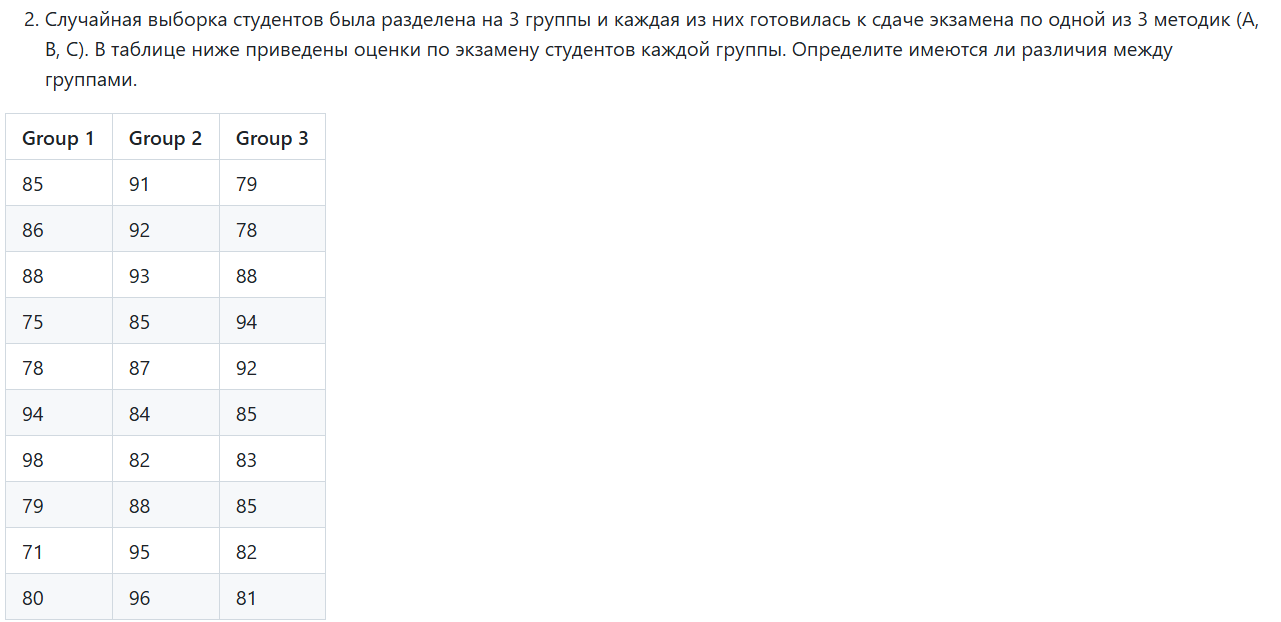

In [56]:
group1 = np.array([85, 86, 88,75,78,94,98,79,71,80])
group2 = np.array([91, 92, 93,85,87,84,82,88,95,96])
group3 = np.array([79, 78, 88,94,92,85,83,85,82,81])

In [58]:
len(list(group1))

10

Сформулируем гипотезы и определим уровень значимости:  
* $H_0:\space\mu_1=\mu_2=\mu_3$  
* $H_a:\space\mu_1\not=\mu_2\not=\mu_3$  


In [67]:
mean1 = group1.mean()
mean2 = group2.mean()
mean3 = group3.mean()
mean1, mean2, mean3

(83.4, 89.3, 84.7)

Выборки независимы, размер всего 10, проверим распределение 

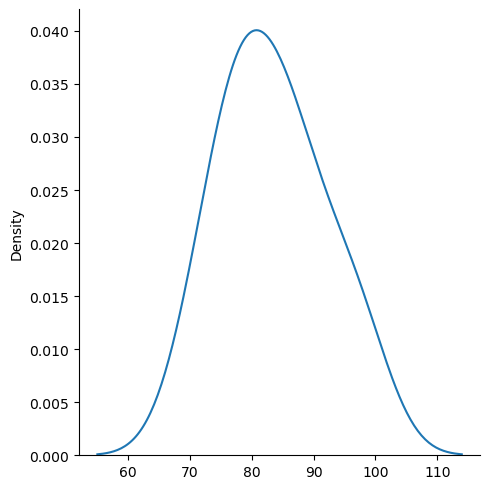

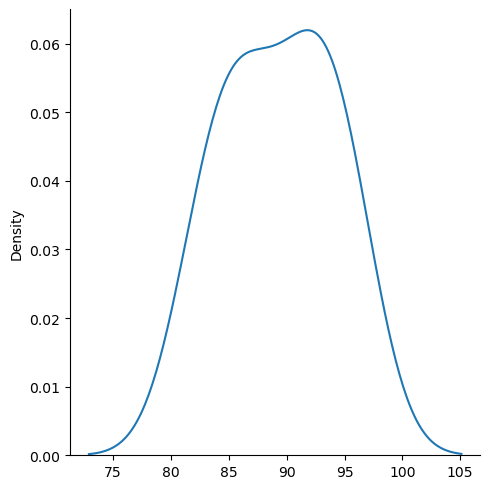

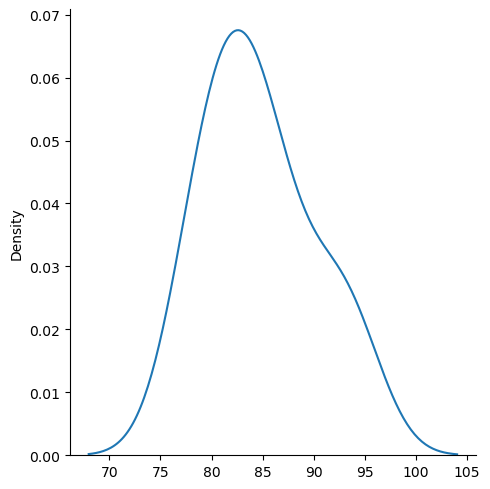

In [74]:
sns.displot(group1, kind='kde')
sns.displot(group2, kind='kde')
sns.displot(group3, kind='kde')

Примерно распределение нормальное,  идем дальше 

In [81]:
group1_std = group1.std(ddof=1)
group2_std = group2.std(ddof=1)
group3_std = group3.std(ddof=1)
print(f'std group1: {group1_std}')
print(f'std group2: {group2_std}')
print(f'std group3: {group3_std}')

std group1: 8.435375246872871
std group2: 4.808557187163549
std group3: 5.2925524193068805


In [83]:
group1_std / group2_std

1.7542424720228176

меньше двух, идем дальше.

In [88]:
f_statistic, p_value = stats.f_oneway(group1, group2, group3)
print(f'f-statistic: {f_statistic}')
print(f'p-value: {p_value}')

f-statistic: 2.3575322551335636
p-value: 0.11384795345837218


Так как полученное значение p-value больше уровня значимости 0.05, мы НЕ можем отвергнуть нулевую гипотезу. Иными словами, у нас есть основания утверждать что разлиции между группами нет.

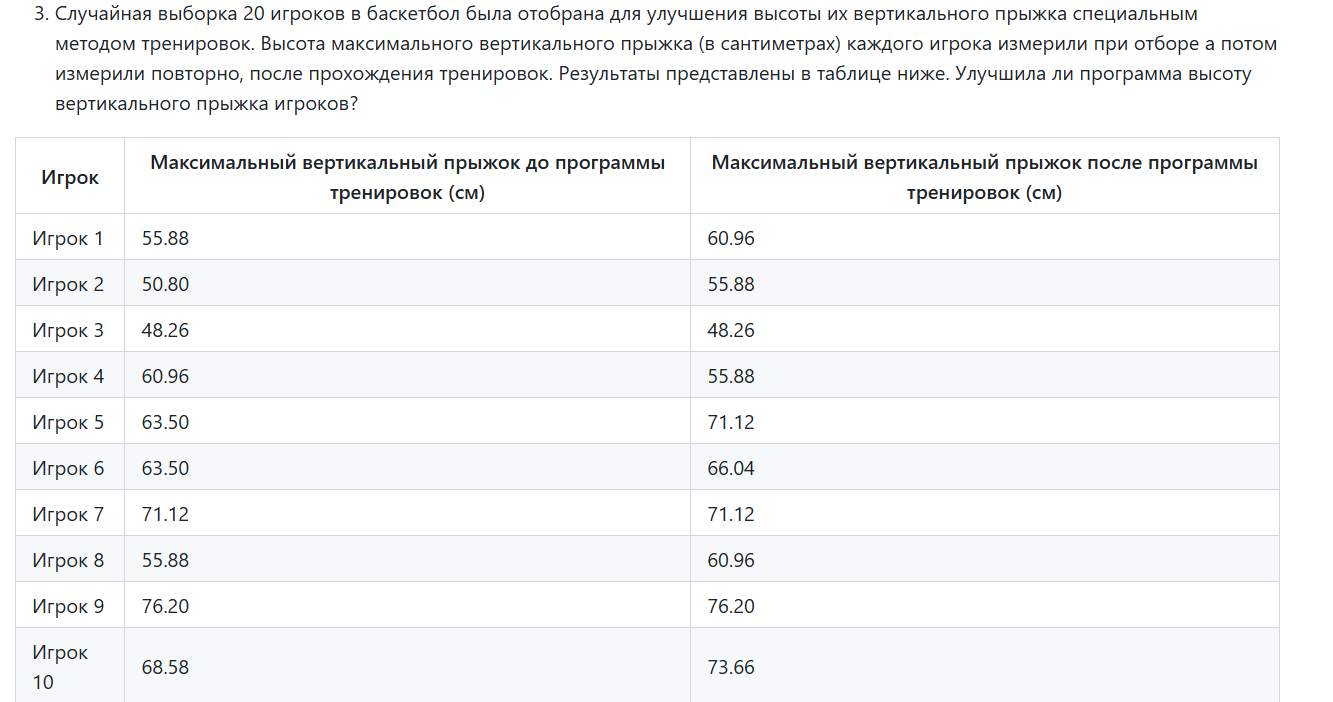

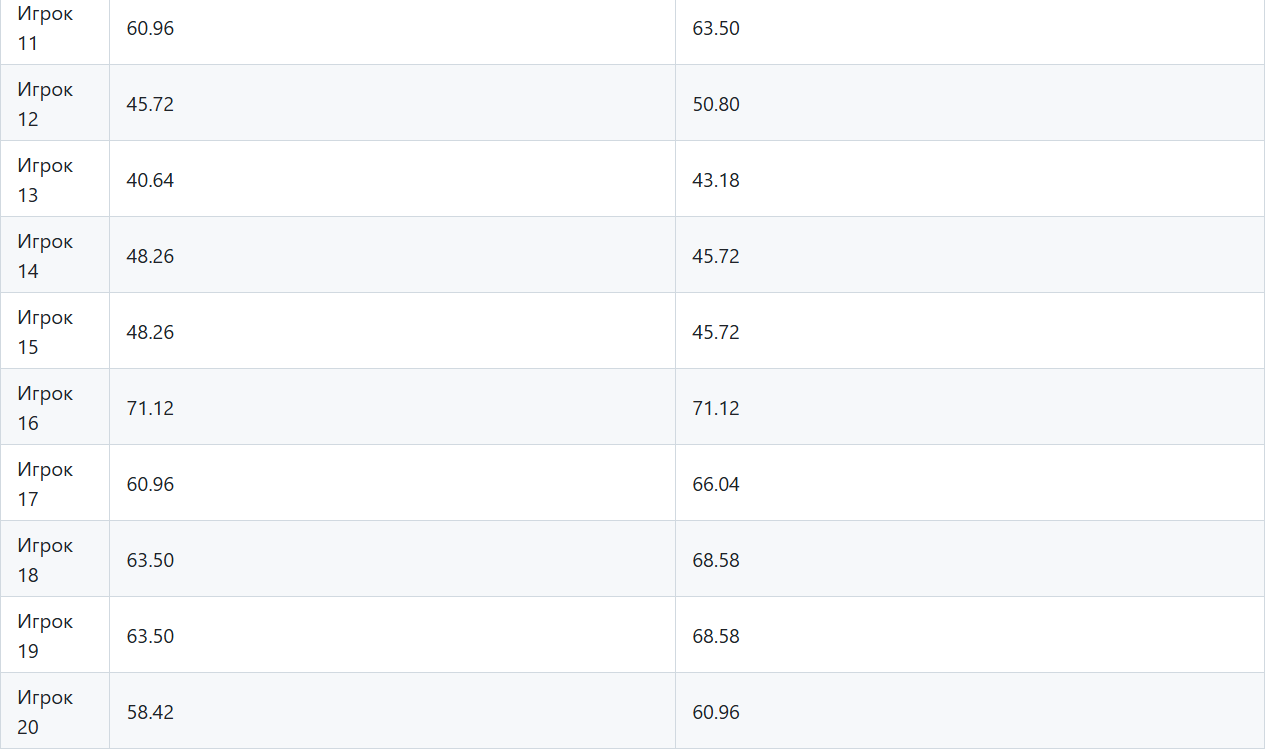

In [100]:
jump_before =  np.array([55.88, 50.80, 48.26, 60.96, 63.50, 63.50, 71.12, 55.88, 76.20, 68.58, 
                         60.96, 45.72, 40.64, 48.26, 48.26, 71.12, 60.96, 63.50, 63.50, 58.42 ])

jump_after = np.array([60.96, 55.88, 48.26, 55.88, 71.12, 66.04, 71.12, 60.96, 76.20, 73.66,
                      63.50, 50.80, 43.18, 45.72, 45.72, 71.12, 66.04, 68.58, 68.58, 60.96])

In [104]:
n = len(jump_after)
n

20

In [106]:
diff = jump_before - jump_after
diff

array([-5.08, -5.08,  0.  ,  5.08, -7.62, -2.54,  0.  , -5.08,  0.  ,
       -5.08, -2.54, -5.08, -2.54,  2.54,  2.54,  0.  , -5.08, -5.08,
       -5.08, -2.54])

* $H_0:\space\mu_d=0$  
* $H_a:\space\mu_d<0$

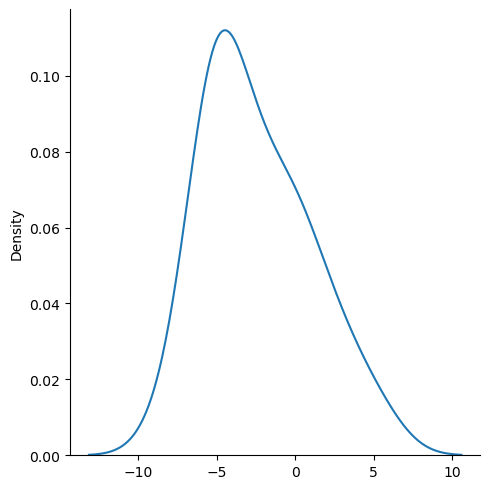

In [111]:
sns.displot(diff, kind='kde')

Похоже на нормальное распределение.

In [118]:
mean_d = diff.mean()
std_d = diff.std(ddof=1)
print(f"Среднее значение разницы выборок: {mean_d}")
print(f"Стандартное отклонение разницы выборок: {std_d}")

Среднее значение разницы выборок: -2.4130000000000007
Стандартное отклонение разницы выборок: 3.3449114534736113


In [120]:
t = mean_d - 0 / (std_d / np.sqrt(n))
t

-2.4130000000000007

In [122]:
p_value = stats.t.cdf(-2.413, df=n-1)
print(f"p-value: {p_value}")

p-value: 0.013044676761316298


Так как p-value всего 1.3%, что гораздо ниже уровня значимости в 5%, мы отвергаем нулевую гипотезу. Иными словами у нас есть достаточно оснований утверждать что программа тренировок улучшила высоту вертикального прыжка игрока.